In [1]:
import os
print("OS Type: ",os.name)

OS Type:  nt


In [2]:
import sys
print("OS Name: ",sys.platform)

OS Name:  win32


In [3]:
import platform
print("OS Platform: ",platform.platform())

OS Platform:  Windows-10-10.0.22621-SP0


In [4]:
import multiprocessing

numberOfCores = multiprocessing.cpu_count()
print("Number of cores are : ",numberOfCores)

Number of cores are :  20


In [5]:
import threading
activeThread = threading.active_count()
print("Number of active threads are : ",activeThread)

Number of active threads are :  9


In [6]:
import numpy as np
import threading
import time

In [7]:
def generate_matrices(num,size):
    matrices =[]
    for _ in range(num):
        matrices.append(np.random.rand(size,size))
    return matrices

In [8]:
def multiply_matrices(constant_matrix, matrices, result, index):
    result[index] = np.dot(constant_matrix, matrices[index])

In [9]:
num_matrices = 500
matrix_size = 5000
constant_matrix = np.random.rand(matrix_size, matrix_size)

In [10]:
constant_matrix

array([[0.60539884, 0.13765943, 0.44227072, ..., 0.76205893, 0.83245556,
        0.70638441],
       [0.18615201, 0.76341397, 0.93937673, ..., 0.84782757, 0.37590854,
        0.86866357],
       [0.20423911, 0.33516464, 0.06703183, ..., 0.29734844, 0.43739412,
        0.80618923],
       ...,
       [0.16370282, 0.03285428, 0.56136277, ..., 0.00404458, 0.43855694,
        0.18807903],
       [0.64031151, 0.77616486, 0.9183335 , ..., 0.57901016, 0.12402574,
        0.58305426],
       [0.78661722, 0.93652733, 0.41503359, ..., 0.80969871, 0.79758463,
        0.75685035]])

In [11]:
time_arr=[None]*(2*numberOfCores)

In [12]:
time_arr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [13]:
matrices = generate_matrices(num_matrices, matrix_size)
result = [None] * num_matrices
activeThreads=0
for num_threads in range(1,2*numberOfCores+1):
    start_time = time.time()
    threads = []
    activeThreads = threading.activeCount()
    print(f"Multiplication with {num_threads} threads:")
    for i in range(num_matrices):
        thread = threading.Thread(target=multiply_matrices, args=(constant_matrix, matrices, result, i))
        threads.append(thread)
        thread.start()
        while True:
            if threading.activeCount() - activeThreads + 1 <= num_threads:
                break
            time.sleep(1)
    while True:
        if threading.activeCount() == activeThreads:
            break
        else:
            print ("    Thread still running (left %d)..."%(threading.activeCount() - activeThreads))
            time.sleep(1)

    print(" All Thread ends")

    print("Program Finished")
    print("Total Time %f sec" % (round( time.time() - start_time,4)))
    time_arr[num_threads-1]=(round( time.time() - start_time,4))

In [ ]:
time_arr

[101.4822,
 50.6158,
 34.5122,
 25.4462,
 20.3787,
 15.4124,
 12.3691,
 10.3176,
 9.2645,
 8.3187,
 7.2992,
 7.3187,
 6.281,
 6.2959,
 5.3109]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
num_threads = [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]

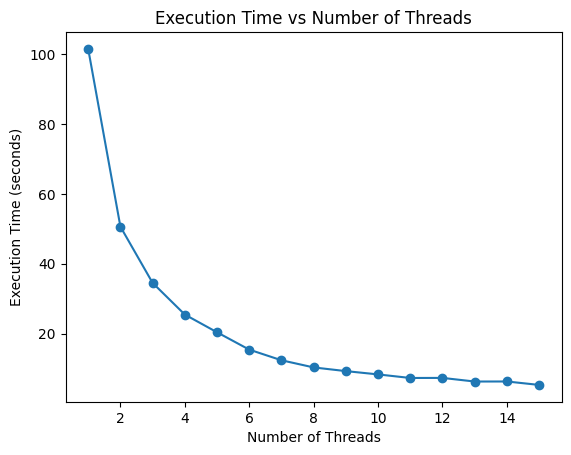

In [ ]:
plt.plot(num_threads, time_arr,marker='o')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Threads')

plt.show()